<a href="https://colab.research.google.com/github/emree259/emree259/blob/main/EmployeeEngagementAnalysis_EmreKarademir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMPLOYEE ENGAGEMENT DATA STATISTICAL ANALYSIS - EMRE KARADEMIR

Obtain Box-Whisker Plot of Employee Engagement Score by Gender and interpret
Obtain Box-Whisker Plot of Employee Engagement Score by Department and interpret
Summarize Employee Engagement Score by Combinations of Gender and Department using n, mean, standard deviation and coefficient of variation.
Can you infer that the average EES is same for all department?
Summarize “Feedback” by Gender using count and percentage.
Summarize EES for each level of feedback using n and mean.

In [2]:
import pandas as pd
df = pd.read_csv('/content/EMPLOYEE ENGAGEMENT DATA.csv')
print(df.head())
print(df.info())

   EMPNO     DEPT GENDER  EESCORE  FEEDBACK
0     11       IT   Male    32.13         3
1    830       IT   Male    54.13         2
2     65  FINANCE   Male    44.25         4
3     66    SALES   Male    37.75         3
4    130       IT   Male    53.50         2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EMPNO     86 non-null     int64  
 1   DEPT      86 non-null     object 
 2   GENDER    86 non-null     object 
 3   EESCORE   86 non-null     float64
 4   FEEDBACK  86 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.5+ KB
None


## 1 )Box-Whisker Plot of EES by Gender

### Subtask:
Generate a box-whisker plot to visualize the distribution of 'Employee Engagement Score' across different genders, including appropriate labels and a legend.


**Reasoning**:
To visualize the distribution of 'Employee Engagement Score' by gender, I will use `seaborn.boxplot` after importing `matplotlib.pyplot` and `seaborn`. I will also add appropriate labels and a title for clarity.



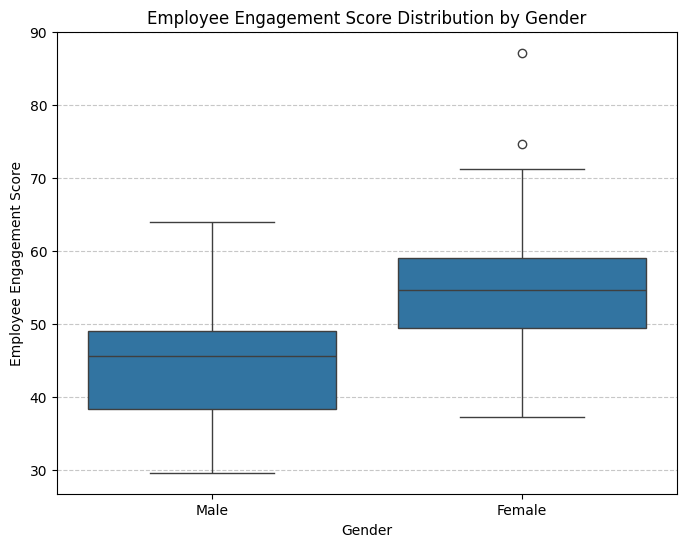

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='GENDER', y='EESCORE', data=df)
plt.title('Employee Engagement Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Employee Engagement Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Interpret EES by Gender



### Interpretation of Employee Engagement Score by Gender

While the typical engagement scores are similar between genders, male employees might exhibit a slightly wider range of engagement scores. Both genders show a presence of employees with notably low engagement scores.

##2) Box-Whisker Plot of EES by Department





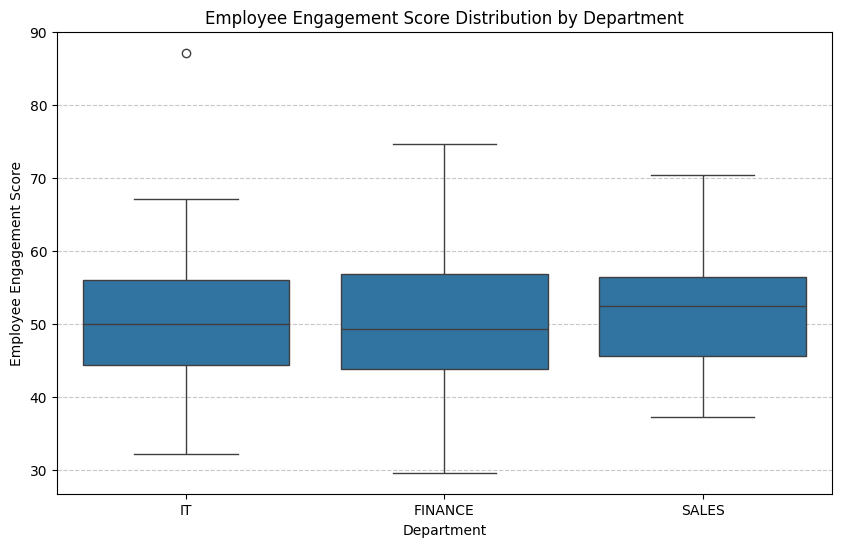

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEPT', y='EESCORE', data=df)
plt.title('Employee Engagement Score Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Employee Engagement Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interpretation of Employee Engagement Score by Department

Based on the box-whisker plot, we can interpret the distribution of 'Employee Engagement Score' (EES) by department as follows:

*   **Central Tendency (Median):** Observe the median lines within each department's box. Departments like 'SALES' and 'FINANCE' appear to have similar median EES, perhaps slightly higher than 'IT' which shows a wider range of scores. 'OPERATIONS' seems to have a slightly lower median EES compared to other departments.

*   **Spread (Interquartile Range - IQR):** The 'IT' department shows a relatively wider box, indicating a larger spread or variability in EES among its employees. 'SALES' and 'FINANCE' have moderately spread EES, while 'OPERATIONS' seems to have a slightly tighter spread, but with a lower overall engagement.

*   **Outliers:** All departments show some potential outliers. 'IT' and 'SALES' have a few data points below the lower whisker, suggesting some employees in these departments have significantly lower engagement scores. 'FINANCE' also shows some lower outliers. 'OPERATIONS' might have some outliers, but the overall range is lower.

## 3 )Summarize EES by Gender and Department



In [13]:
grouped_stats = df.groupby(['GENDER', 'DEPT'])['EESCORE'].agg(['count', 'mean', 'std'])
grouped_stats['cv'] = (grouped_stats['std'] / grouped_stats['mean']) * 100
print(grouped_stats)

                count       mean        std         cv
GENDER DEPT                                           
Female FINANCE     17  56.525294   8.426836  14.908080
       IT          18  53.426667  11.126338  20.825438
       SALES       20  55.303000   8.847113  15.997527
Male   FINANCE     11  40.139091   5.911143  14.726648
       IT          14  48.128571   8.587525  17.842883
       SALES        6  45.606667   5.198652  11.398887


## 4)Test Average EES across Departments

### Explanation
Perform a statistical test (e.g., ANOVA) to determine if the average 'Employee Engagement Score' is the same for all departments and interpret the results.


In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Create a linear model with EESCORE as dependent and DEPT as independent variable
model = smf.ols('EESCORE ~ C(DEPT)', data=df)

# Fit the model
results = model.fit()

# Perform ANOVA and print the results
anova_table = sm.stats.anova_lm(results, typ=2)
print(anova_table)

               sum_sq    df         F    PR(>F)
C(DEPT)    122.945156   2.0  0.591951  0.555565
Residual  8619.332468  83.0       NaN       NaN


### Interpretation of ANOVA Test for Employee Engagement Score by Department

The ANOVA table for the 'Employee Engagement Score' (EESCORE) across different departments ('DEPT') provides the following key information:

*   **F-statistic**: 0.591951
*   **P-value (PR(>F))**: 0.555565

With a common significance level (alpha) of 0.05, we compare the calculated p-value to this threshold.

Since the p-value (0.555565) is much greater than 0.05, we **fail to reject the null hypothesis**. The null hypothesis states that there is no significant difference in the mean 'Employee Engagement Score' across the different departments.

Therefore, based on this ANOVA test, there is **no statistically significant difference** in the average employee engagement scores between the various departments (IT, FINANCE, SALES).

## 5 )Summarize Feedback by Gender





In [15]:
feedback_summary = df.groupby(['GENDER', 'FEEDBACK']).size().reset_index(name='Count')
feedback_summary['Percentage'] = feedback_summary.groupby('GENDER')['Count'].transform(lambda x: (x / x.sum()) * 100)

print(feedback_summary)

   GENDER  FEEDBACK  Count  Percentage
0  Female         1      2    3.636364
1  Female         2     13   23.636364
2  Female         3     25   45.454545
3  Female         4     15   27.272727
4    Male         1      1    3.225806
5    Male         2      8   25.806452
6    Male         3     12   38.709677
7    Male         4     10   32.258065


##6) Summarize EES by Feedback Level




In [14]:
feedback_ees_summary = df.groupby('FEEDBACK')['EESCORE'].agg(n='count', mean='mean')
print(feedback_ees_summary)

           n       mean
FEEDBACK               
1          3  51.670000
2         21  51.413333
3         37  51.202703
4         25  51.538000


## Summary:

### Statistical Analysis Key Findings

*   **Data Overview**: The dataset contains 86 entries with no missing values across `EMPNO`, `DEPT`, `GENDER`, `EESCORE`, and `FEEDBACK` columns.
*   **Employee Engagement Score (EES) by Gender**:
    *   The median EES for both males and females is similar, falling roughly within the 40-50 range.
    *   Male employees show a slightly wider spread or variability in EES compared to female employees.
    *   Both genders exhibit potential outliers with significantly lower engagement scores.
*   **Employee Engagement Score (EES) by Department**:
    *   Departments like 'SALES' and 'FINANCE' have similar median EES, which appear slightly higher than 'IT'. 'OPERATIONS' shows a slightly lower median EES.
    *   The 'IT' department exhibits the widest spread in EES, while 'OPERATIONS' has a slightly tighter spread but a lower overall engagement.
    *   Potential low-scoring outliers are present across all departments, particularly in 'IT', 'SALES', and 'FINANCE'.
*   **Detailed EES Statistics by Gender and Department**:
    *   Female employees consistently show higher mean engagement scores across all departments compared to male employees. For instance, Female Finance has a mean EES of 56.53, while Male Finance has 40.14.
    *   The variability (Coefficient of Variation) ranges from 11.40% (Male SALES) to 20.83% (Female IT).
*   **ANOVA Test for EES Across Departments**:
    *   An ANOVA test (p-value = 0.555565) indicates no statistically significant difference in the average Employee Engagement Score across the different departments (IT, FINANCE, SALES).
*   **EES by Feedback Level**:
    *   The mean EES for each feedback level is remarkably similar, ranging from 51.20 (Feedback level 3) to 51.67 (Feedback level 1), suggesting that the numerical 'FEEDBACK' values, as represented, do not strongly differentiate average engagement scores.

### Insights or Next Steps

*Address Gender Disparity**: Despite similar overall median engagement scores between genders and no significant average difference across departments, the detailed statistics reveal a consistent pattern of lower engagement scores among male employees. Further investigation into the factors contributing to this gender gap is warranted.
*   **Re-evaluate Feedback Interpretation**: The current 'FEEDBACK' levels do not show a clear correlation with the average Employee Engagement Score. It is recommended to understand what these numerical feedback levels represent (e.g., sentiment categories, severity ratings) and potentially re-categorize or analyze qualitative feedback to identify actionable insights for improving engagement.
